In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import h5py as h5

MAX_NB_WORDS =  50000
df = pd.read_csv("/content/test_data.csv")
#df['Organic Searches'].plot.kde()
avg = df.groupby(by = ['Page Title'], as_index = False).agg({'Pageviews' : 'sum', 'Organic Searches' : 'sum'})
df2 = df.drop_duplicates(subset=['Page Title'])
df = pd.merge(avg, df2[['Page Title', 'date_published', 'category']], how='left', on='Page Title')
df['log_organic'] = np.log(df['Organic Searches'] + 1)

df['date_published'] = pd.to_datetime(df['date_published'])
df = df[df['date_published'].dt.year >= 2020]

# make sure to load model if running in google collab
model = keras.models.load_model('/content/model.h5')
MAX_SEQUENCE_LENGTH = 250 
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# dont edit, nonsense headline to make sure the model does not deem this as good
new_headline = ['l bozo']
tokenizer.fit_on_texts(df['Page Title'])
seq = tokenizer.texts_to_sequences(new_headline)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
nonesense = model.predict(padded)
index_max = max(range(len(nonesense[0])), key=nonesense[0].__getitem__)
labels = []
if index_max == 0:
  labels.append('not hit')
  labels.append('hit')
elif index_max == 1:
  labels.append('hit')
  labels.append('not hit')

print(nonesense, labels[np.argmax(nonesense)])

FileNotFoundError: ignored

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

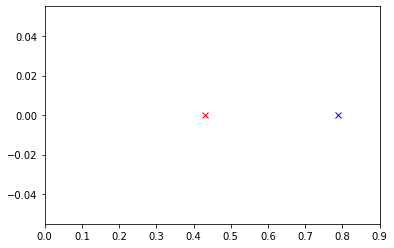

In [41]:
# Replace this headline with your headline
new_headline = ['never that have be existed']
# headline ['umd suffers defeat'] is less likely


seq = tokenizer.texts_to_sequences(new_headline)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
print(padded)
pred = model.predict(padded)

print(pred, labels[np.argmax(pred)])
x = np.arange (0, 1, .1)
print(nonesense[0][0])
print(pred[0][0])
plt.plot(nonesense[0][0], 0, 'x', color='b')
plt.plot(pred[0][0], 0, 'x', color='r')
plt.xticks(x)
plt.show()

# plot -- red represents your predicted value, blue is the nonsense headline
# The closer red is to blue, the less likely the model feels your article will
# have organic searches
# This model is not a representation of how well your article will do,
# rather, it shows the likelyhood that 
# google will show it to people when searched